In [1]:
### Data Analysis packages
import numpy as np
import pandas as pd
import re
import warnings

### Data Visualization packages
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from scipy import stats

### sklearn preprocessing tools
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

### SMOTE for oversampling
from imblearn.over_sampling import SMOTE

### Machine learning classification Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [2]:
## Initial settings
matplotlib.rcParams["font.size"] = 10
matplotlib.rcParams["figure.figsize"] = (8,6)
matplotlib.rcParams["figure.facecolor"] = '#00000000'

sns.set_style("darkgrid")
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )
sns.set_theme(color_codes=True)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

# Information about the data set 

In [3]:
# Define the paths to the dataset and data dictionary files
dataset_path = 'data\Dataset.csv'
data_dict_path = 'data\Data_Dictionary.csv'

# Read the CSV files into pandas DataFrames
df_raw = pd.read_csv(dataset_path)
df_info= pd.read_csv(data_dict_path)

In [4]:
df_info

,Variable,Description
0,ID,Client Loan application ID
1,Client_Income,Client Income in $
2,Car_Owned,Any Car owned by client before applying for the loan for another car (0 means No and 1 means otherwise)
3,Bike_Owned,Any bike owned by client (0 means No and 1 means otherwise)
4,Active_Loan,Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
5,House_Own,Any house owned by client (0 means No and 1 means otherwise)
6,Child_Count,Number of children the client has
7,Credit_Amount,Credit amount of the loan in $
8,Loan_Annuity,Loan annuity in $
9,Accompany_Client,Who accompanied the client when client applied for the loan


In [5]:
df_raw.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [6]:
df_raw.shape

(121856, 40)

<Axes: >

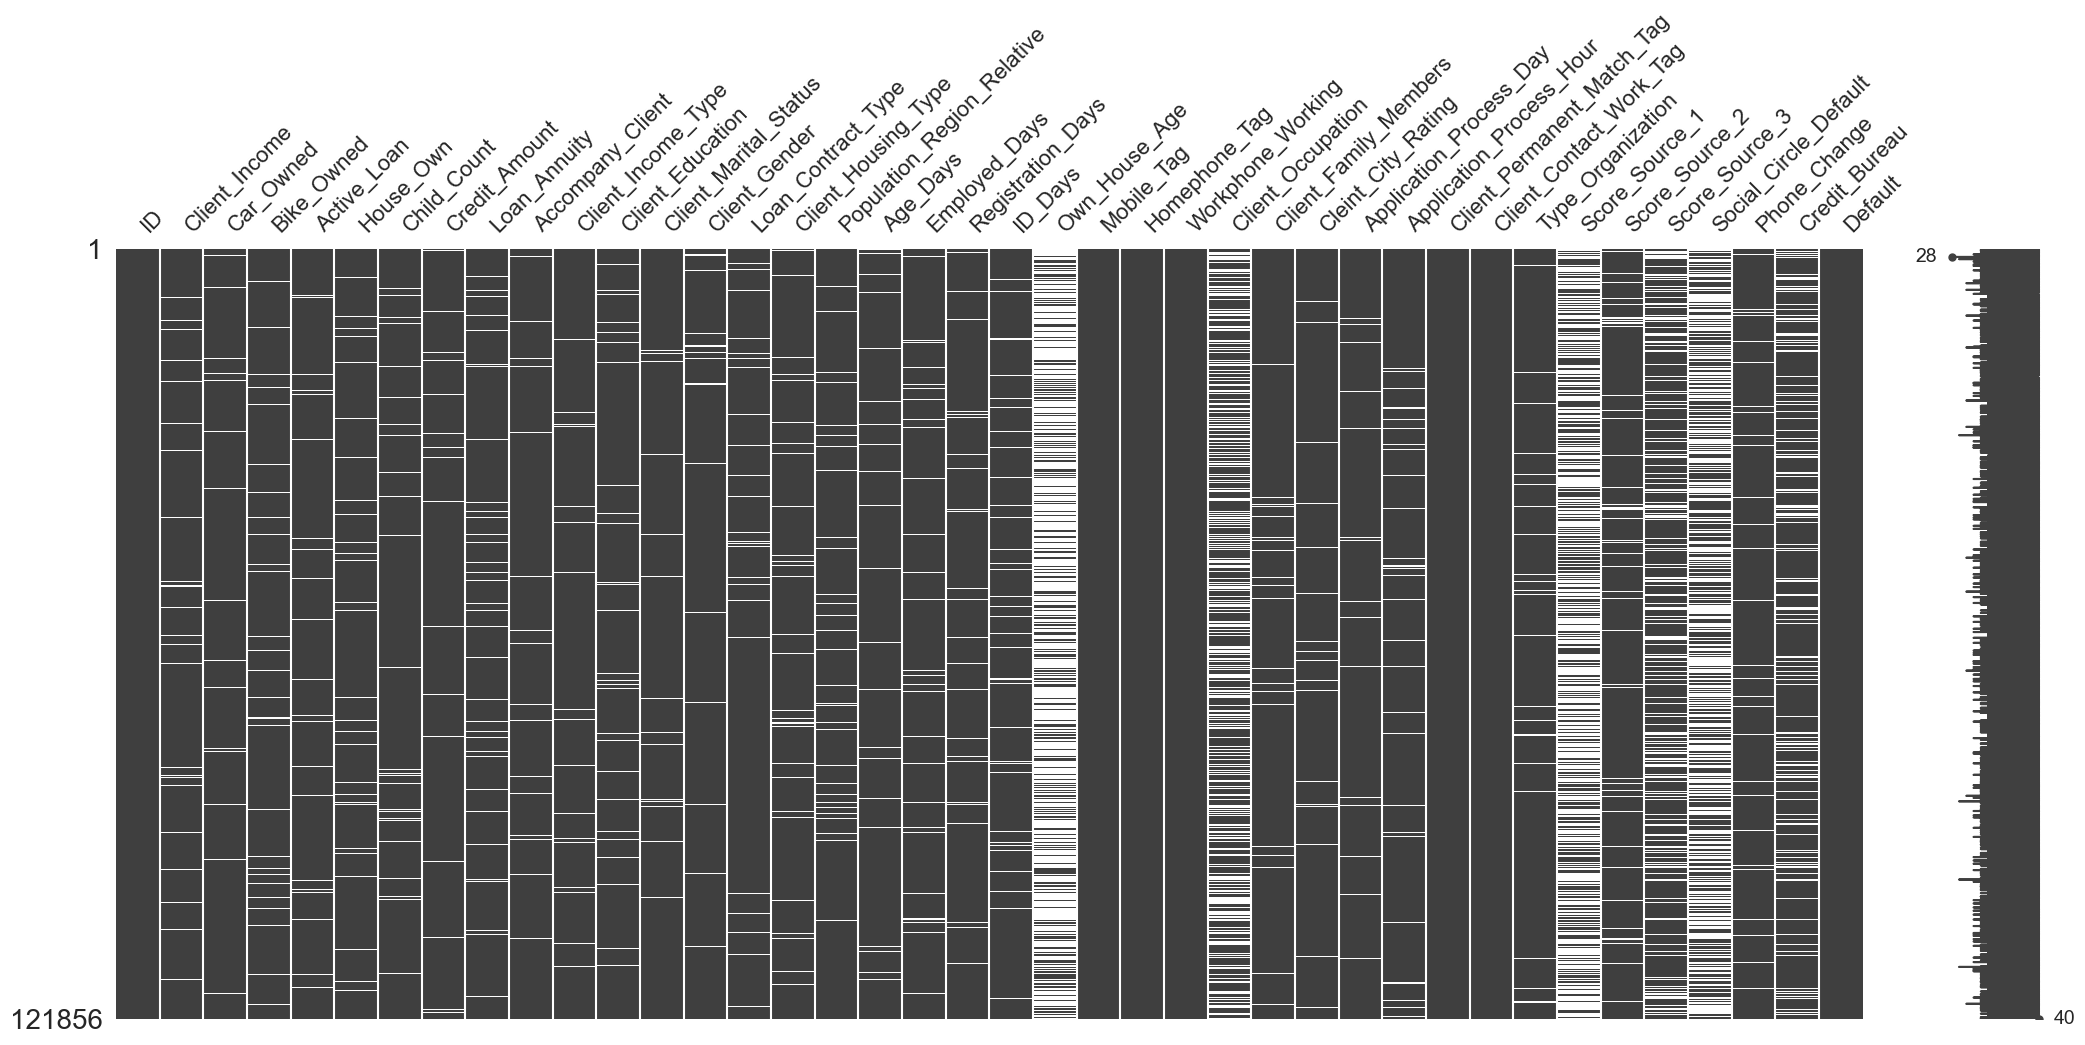

In [7]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(df_raw)

In [8]:
## Percentage of Null values
null_df = (df_raw.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns = ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df_raw)*100, 2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Client_Occupation,41435,34.00
Score_Source_3,26921,22.09
Credit_Bureau,18540,15.21
ID_Days,5968,4.90
Score_Source_2,5686,4.67
Population_Region_Relative,4857,3.99
Loan_Annuity,4812,3.95


In [9]:
df_raw.drop_duplicates()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,Service,Secondary,M,Female,CL,Home,0.031329,12889.0,2863.0,2661.0,2943.0,NaN,1,0,0,Laborers,2.0,2.0,4.0,16.0,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.018209,8648.0,636.0,902.0,1209.0,NaN,1,1,0,Sales,2.0,3.0,4.0,12.0,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.008068,9152.0,1623.0,3980.0,353.0,NaN,1,0,0,High skill tech,3.0,3.0,5.0,11.0,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.028663,10290.0,847.0,895.0,2902.0,4.0,1,0,0,Sales,2.0,2.0,1.0,12.0,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


- Almost all the variables except ID, some client variables, phone variables and default have missing values

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [11]:
df_raw.drop(columns = ['ID','Application_Process_Day','Application_Process_Hour'], inplace=True)

In [12]:
def replace_unwanted_chars(value):
    if isinstance(value, str):
        return re.sub(r'[$#@,]', '', value)
    return value

df_raw = df_raw.applymap(replace_unwanted_chars)

In [13]:
df_raw.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [14]:
# Find columns where the data type is object but should be numeric
potential_numeric_columns = [column for column in df_raw.columns if df_raw[column].dtype == 'object']

# Check if these columns can be converted to numeric, ignoring errors
numeric_issues = {}
for column in potential_numeric_columns:
    try:
        df_raw[column].astype(float)
    except ValueError:
        numeric_issues[column] = df_raw[column].unique()

# Display columns with numeric issues
for column, values in numeric_issues.items():
    print(f"Column: {column}")
    print(f"Unique values causing issues: {values}")
    print("\n")

Column: Client_Income
Unique values causing issues: ['6750' '20250' '18000' ... '13140' '9764.1' '12840.75']


Column: Credit_Amount
Unique values causing issues: ['61190.55' '15282' '59527.35' ... '89138.7' '88885.8' '135534.6']


Column: Loan_Annuity
Unique values causing issues: ['3416.85' '1826.55' '2788.2' ... 1736.55 3388.05 2989.35]


Column: Accompany_Client
Unique values causing issues: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '' 'Group']


Column: Client_Income_Type
Unique values causing issues: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']


Column: Client_Education
Unique values causing issues: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']


Column: Client_Marital_Status
Unique values causing issues: ['M' 'W' 'S' nan 'D']


Column: Client_Gender
Unique values causing issues: ['Male' 'Female' nan 'XNA']


Column: Loan_Contract_Type
Unique values causing issues: ['CL' 'R

#### The following columns have data types as object but contain numeric values due to the presence of some unnecessary string values:

- 1.Client_Income
- 2.Credit_Amount
- 3.Loan_Annuity
- 4.Population_Region_Relative
- 5 Age_Days
- 6 Employed_Days
- 7.Registration_Days
- 8.ID_Days
- 9.Score_Source_3

# Code to remove unnecessary string values than the valid one

In [15]:
def clean_columns(data):
    # List of columns that should be converted to integers (days and counts)
    columns_to_clean = [
        'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days',
        'Client_Income', 'Credit_Amount', 'Loan_Annuity',
        'Population_Region_Relative', 'Score_Source_3'
    ]

    # # Function to clean columns by replacing non-numeric characters and empty strings with NaN
    # def clean_column(column):
    #     # data[column] = data[column].astype(str).str.replace('[^0-9.]', '', regex=True)
    #     # data[column] = data[column].replace("", np.nan)
    #     data[column] = pd.to_numeric(data[column], errors='coerce')

    # Clean all specified columns
    for column in columns_to_clean:
        data[column] = pd.to_numeric(data[column], errors='coerce')

    return data

# Apply the function to the dataframe
df = clean_columns(df_raw)

# Verify the cleaning process
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,1,1,0,Sales,2.0,2.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,1,0,1,NaN,2.0,2.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,1,0,0,Realty agents,2.0,2.0,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,1,0,0,NaN,2.0,3.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,6.0,1,0,0,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [16]:
df['Client_Gender'] = df['Client_Gender'].replace('XNA', 'Unknown')

# Verify the replacement
unique_client_gender_values = df['Client_Gender'].unique()
print(unique_client_gender_values)

['Male' 'Female' nan 'Unknown']


# Data Analysis on Default Column


In [17]:
df["Default"].value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

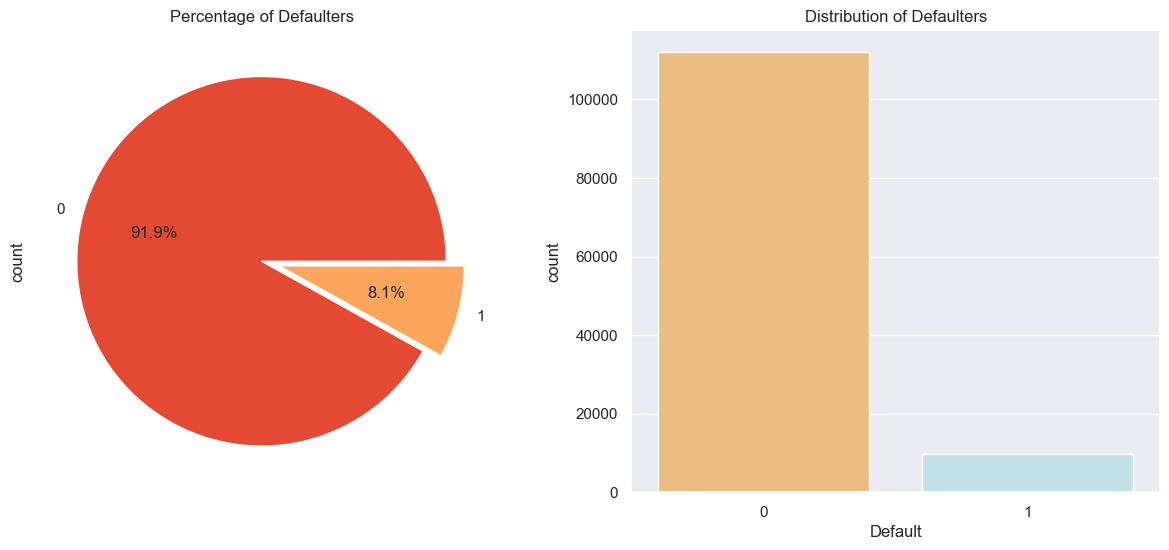

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
df['Default'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Defaulters')
sns.countplot(x='Default',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Defaulters')
plt.show();

# Categorical data 

In [19]:
#categorical columns
categorical_columns = ['Car_Owned','Bike_Owned','Active_Loan','House_Own','Mobile_Tag', 'Homephone_Tag', 'Workphone_Working','Default',]

# Replace '1' with 'yes' and '0' with 'no' in each column
for col in categorical_columns:
    df[col] = df[col].replace({1: 'Yes', 0: 'No'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118234 non-null  float64
 1   Car_Owned                   118275 non-null  object 
 2   Bike_Owned                  118232 non-null  object 
 3   Active_Loan                 118221 non-null  object 
 4   House_Own                   118195 non-null  object 
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118219 non-null  float64
 7   Loan_Annuity                117030 non-null  float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [21]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,No,No,Yes,No,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,NaN,Yes,Yes,No,Sales,2.0,2.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,No
1,20250.0,Yes,No,Yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,0.0,Yes,No,Yes,NaN,2.0,2.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,No
2,18000.0,No,No,Yes,No,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,NaN,Yes,No,No,Realty agents,2.0,2.0,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,No
3,15750.0,No,No,Yes,Yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,NaN,Yes,No,No,NaN,2.0,3.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,No
4,33750.0,Yes,No,Yes,No,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,6.0,Yes,No,No,Laborers,4.0,1.0,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,No


In [22]:
#checking the unique values and distribution in the mobile tag column
mobile_Tag = df['Mobile_Tag'].unique()
print(mobile_Tag)

mobile_Tag_counts = df['Mobile_Tag'].value_counts()
print(mobile_Tag_counts)

['Yes' 'No']
Mobile_Tag
Yes    121855
No          1
Name: count, dtype: int64


In [23]:
df.drop(columns = 'Mobile_Tag', inplace=True)
df.shape

(121856, 36)

In [24]:
df_raw["Client_Occupation"].isnull().sum()

41435

In [25]:
#checking the unique values and distribution in the client occupation column
unique_occupations = df['Client_Occupation'].unique()
print(unique_occupations)

['Sales' nan 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


In [26]:
occupation_counts = df['Client_Occupation'].value_counts()
print(occupation_counts)

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


In [27]:
# %pip install plotly nbformat>=4.2.0

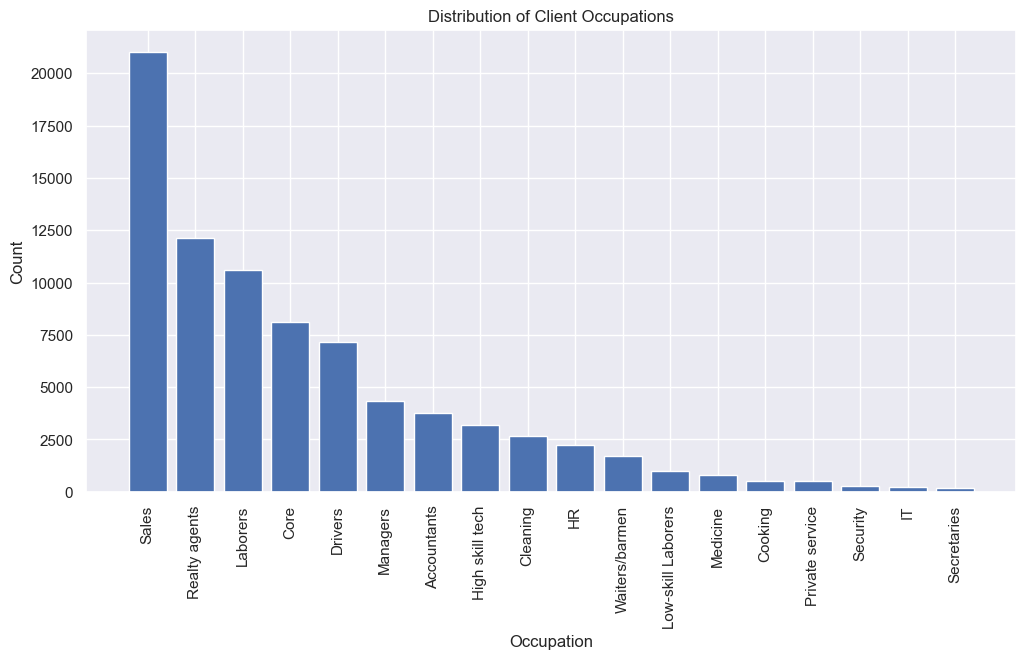

In [28]:
# Filter out missing values (NaN) in the 'Client_Occupation' column
temp_df = df[df['Client_Occupation'].notna()]

# Data
unique_occupations = temp_df['Client_Occupation'].unique()
occupation_counts = temp_df['Client_Occupation'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_occupations, occupation_counts)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Client Occupations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [29]:
# Define a function to map occupations to new categories
def map_occupation(category):
    if pd.isna(category):
        return 'Unknown'
    elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
        return 'Professional'
    elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
        return 'Skilled Labor'
    elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
        return 'Service'
    elif category == 'Medicine':
        return 'Healthcare'
    else:
        return 'Other'

# Apply the function to the 'Client_Occupation' column and create a new 'Occupation_Category' column
df['Client_Occupation'] = df['Client_Occupation'].apply(map_occupation)

<Axes: xlabel='Client_Occupation'>

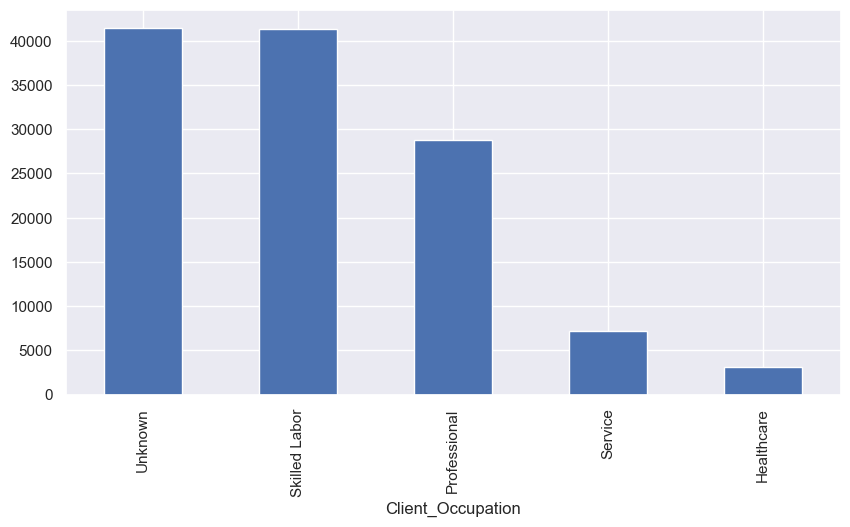

In [30]:
plt.figure(figsize=(10,5))
df['Client_Occupation'].value_counts().plot(kind='bar')

In [31]:
#checking the unique values and distribution in the client occupation column
unique_organizations = df['Type_Organization'].unique()
print(unique_organizations)

['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' nan
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Industry: type 9' 'Postal' 'University'
 'Transport: type 2' 'Restaurant' 'Electricity' 'Police'
 'Industry: type 4' 'Security Ministries' 'Services' 'Transport: type 3'
 'Mobile' 'Hotel' 'Security' 'Industry: type 7' 'Advertising' 'Cleaning'
 'Realtor' 'Trade: type 6' 'Culture' 'Industry: type 5' 'Telecom'
 'Trade: type 1' 'Industry: type 12' 'Industry: type 8' 'Insurance'
 'Emergency' 'Legal Services' 'Industry: type 10' 'Trade: type 4'
 'Industry: type 6' 'Transport: type 1' 'Industry: type 13' 'Religion'
 'Trade: type 5']


In [32]:
# Define a function to map organization types to new categories
def map_organization(category):
    if pd.isna(category):
        return 'Unknown'
    elif category == 'XNA':
        return 'Unknown'
    elif category in ['Self-employed', 'Government']:
        return 'Public Sector'
    elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
        return 'Business'
    elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
        return 'Trade'
    elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
        return 'Institution'
    elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
        return 'Transport'
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type_Organization'] = df['Type_Organization'].apply(map_organization)

<Axes: xlabel='Type_Organization'>

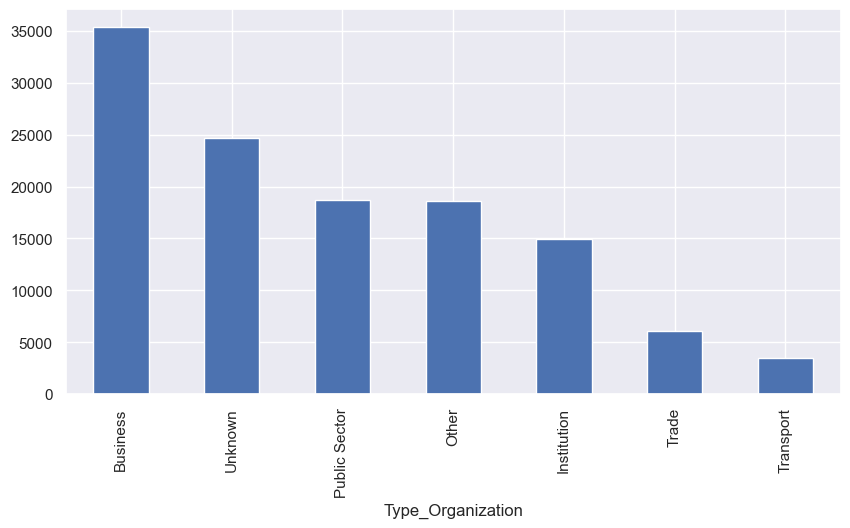

In [33]:
plt.figure(figsize=(10,5))
df['Type_Organization'].value_counts().plot(kind='bar')

In [34]:
df['Type_Organization'].value_counts()

Type_Organization
Business         35341
Unknown          24694
Public Sector    18696
Other            18646
Institution      14969
Trade             6045
Transport         3465
Name: count, dtype: int64

In [35]:
## Percentage of Null values
null_df = (df.isnull().sum()).sort_values(ascending=False).to_frame()
null_df.columns= ["No of Null values"]
null_df["% of Null values"] = round(null_df["No of Null values"]/len(df)*100,2)
null_df[null_df["No of Null values"] > 0]

,No of Null values,% of Null values
Own_House_Age,80095,65.73
Score_Source_1,68835,56.49
Social_Circle_Default,61928,50.82
Score_Source_3,26922,22.09
Credit_Bureau,18540,15.21
ID_Days,5985,4.91
Score_Source_2,5686,4.67
Population_Region_Relative,4868,3.99
Loan_Annuity,4826,3.96
Client_Income_Type,3701,3.04


In [36]:
# Calculate the percentage of missing values for each column
percent_missing = (df.isnull().sum() / len(df)) * 100

# Create a list of columns to drop where missing values are greater than 20 percent
columns_to_drop = percent_missing[percent_missing > 23].index

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print("Columns with missing values greater than 20 percent have been dropped.")
print("Remaining columns:")
df.head()

Columns with missing values greater than 20 percent have been dropped.
Remaining columns:


,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,No,No,Yes,No,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Professional,2.0,2.0,Yes,Yes,Public Sector,0.478787,NaN,63.0,NaN,No
1,20250.0,Yes,No,Yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,Unknown,2.0,2.0,Yes,Yes,Public Sector,0.215068,NaN,NaN,NaN,No
2,18000.0,No,No,Yes,No,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Professional,2.0,2.0,Yes,Yes,Public Sector,0.552795,0.329655,277.0,0.0,No
3,15750.0,No,No,Yes,Yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,No,No,Unknown,2.0,3.0,Yes,Yes,Unknown,0.135182,0.631355,1700.0,3.0,No
4,33750.0,Yes,No,Yes,No,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Skilled Labor,4.0,1.0,Yes,Yes,Business,0.301182,0.355639,674.0,1.0,No


In [37]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,6750.0,No,No,Yes,No,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957.0,1062.0,6123.0,383.0,Yes,No,Professional,2.0,2.0,Yes,Yes,Public Sector,0.478787,NaN,63.0,NaN,No
1,20250.0,Yes,No,Yes,NaN,0.0,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162.0,4129.0,7833.0,21.0,No,Yes,Unknown,2.0,2.0,Yes,Yes,Public Sector,0.215068,NaN,NaN,NaN,No
2,18000.0,No,No,Yes,No,1.0,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790.0,5102.0,NaN,331.0,No,No,Professional,2.0,2.0,Yes,Yes,Public Sector,0.552795,0.329655,277.0,0.0,No
3,15750.0,No,No,Yes,Yes,0.0,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195.0,365243.0,NaN,775.0,No,No,Unknown,2.0,3.0,Yes,Yes,Unknown,0.135182,0.631355,1700.0,3.0,No
4,33750.0,Yes,No,Yes,No,2.0,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366.0,2977.0,5516.0,4043.0,No,No,Skilled Labor,4.0,1.0,Yes,Yes,Business,0.301182,0.355639,674.0,1.0,No


In [38]:
df.shape

(121856, 33)

In [39]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
nan_values

NaN values in the remaining DataFrame:


Client_Income                  3622
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3637
Loan_Annuity                   4826
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4868
Age_Days                       3617
Employed_Days                  3666
Registration_Days              3631
ID_Days                        5985
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Cleint_City_Rating             2409
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization           

In [40]:
# numerical and categoriacl columns(features)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [41]:
categorical_cols.remove('Default')

# Print the total number of categorical columns (excluding the last one)
print("Total categorical columns are:", len(categorical_cols))
print(categorical_cols)

Total categorical columns are: 17
['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [42]:
# Function to fill missing values
def fill_missing_values(data, categorical_cols, numeric_cols):
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
    
    num_imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = num_imputer.fit_transform(data[numeric_cols])
    
    return data

In [43]:
df=fill_missing_values(df, categorical_cols, numeric_cols)

In [44]:
df.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Score_Source_3                0
Phone_Change                  0
Credit_B

In [45]:
#label encode all object variables

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Car_Owned: [0 1]
Bike_Owned: [0 1]
Active_Loan: [1 0]
House_Own: [0 1]
Accompany_Client: [1 6 4 3 5 0 2]
Client_Income_Type: [1 5 4 2 6 7 3 0]
Client_Education: [4 0 1 2 3]
Client_Marital_Status: [1 3 2 0]
Client_Gender: [1 0 2]
Loan_Contract_Type: [0 1]
Client_Housing_Type: [1 0 3 2 4 5]
Homephone_Tag: [1 0]
Workphone_Working: [0 1]
Client_Occupation: [1 4 3 2 0]
Client_Permanent_Match_Tag: [1 0]
Client_Contact_Work_Tag: [1 0]
Type_Organization: [3 6 0 2 5 4 1]
Default: [0 1]


In [46]:
df.corr()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
Client_Income,1.000000,0.167367,-0.004133,0.002182,0.003949,0.025258,0.317541,0.390341,-0.023533,-0.148113,-0.194381,-0.036013,-0.153249,0.000054,0.010684,0.002405,-0.050864,-0.128618,-0.057486,-0.023385,-0.039024,0.001170,-0.098004,0.028580,-0.187803,-0.006986,-0.015770,-0.125370,0.034231,-0.057386,0.039321,0.032637,-0.021115
Car_Owned,0.167367,1.000000,-0.000330,-0.001541,-0.007948,0.096511,0.110984,0.135097,0.014614,-0.030019,-0.087061,-0.090584,-0.336563,0.000575,-0.010387,-0.001550,-0.127765,-0.152772,-0.081046,-0.014664,0.011595,-0.008947,-0.046637,0.143923,-0.021865,-0.002886,-0.088579,-0.120399,0.015644,-0.008905,0.034673,-0.025230,-0.022572
Bike_Owned,-0.004133,-0.000330,1.000000,0.001769,0.001983,0.001411,0.004963,-0.000931,0.002548,-0.004875,0.005661,-0.005676,0.005285,0.005664,-0.001235,0.005867,0.000828,-0.000815,-0.004752,0.000704,-0.002693,-0.006119,0.001270,0.002880,0.000995,-0.001446,-0.003657,-0.001567,0.001139,-0.004103,-0.004937,0.000178,-0.000440
Active_Loan,0.002182,-0.001541,0.001769,1.000000,-0.005148,0.000812,0.000499,-0.001284,-0.002815,-0.000865,-0.001046,0.002038,0.005286,0.002840,-0.002923,0.004380,0.000881,0.002356,-0.000774,0.000021,0.000941,-0.000310,0.001473,-0.001314,-0.003341,0.005738,0.004121,0.001060,0.000954,0.002976,0.008558,0.007168,0.000073
House_Own,0.003949,-0.007948,0.001983,-0.005148,1.000000,-0.003034,-0.038793,-0.003319,0.052559,0.004768,0.020666,0.003263,0.041917,0.065562,-0.044133,0.002942,0.115031,0.066363,0.023690,-0.006450,-0.110233,-0.039967,0.024667,0.007023,0.004010,0.054007,0.033441,0.057734,0.004548,0.030655,-0.022097,0.056793,-0.000619
Child_Count,0.025258,0.096511,0.001411,0.000812,-0.003034,1.000000,-0.001448,0.020353,0.021687,0.002274,-0.034196,-0.142129,-0.045243,0.025728,0.010830,-0.003249,-0.315428,-0.229726,-0.172790,0.022527,0.050906,-0.028979,-0.114063,0.850233,0.023959,-0.017706,-0.065423,-0.164998,-0.006145,-0.036510,0.008818,-0.028647,0.019277
Credit_Amount,0.317541,0.110984,0.004963,0.000499,-0.038793,-0.001448,1.000000,0.740960,0.028411,-0.099887,-0.119441,-0.086018,-0.023790,-0.212599,0.003510,-0.000157,0.052370,-0.061859,-0.008532,0.004842,-0.021597,0.029868,-0.064182,0.056980,-0.108128,0.026233,-0.002113,-0.059853,0.029668,0.032742,0.068057,-0.034794,-0.030472
Loan_Annuity,0.390341,0.135097,-0.000931,-0.001284,-0.003319,0.020353,0.740960,1.000000,0.024624,-0.115975,-0.141107,-0.081976,-0.074831,-0.226790,0.006815,0.000817,-0.009549,-0.099520,-0.036266,-0.011165,-0.026373,0.012532,-0.082987,0.070178,-0.136844,0.007804,-0.008571,-0.089152,0.026507,0.021936,0.058138,-0.009101,-0.011939
Accompany_Client,-0.023533,0.014614,0.002548,-0.002815,0.052559,0.021687,0.028411,0.024624,1.000000,0.007232,0.037423,-0.039905,0.001951,-0.014348,-0.006334,-0.002310,0.018238,0.022685,0.006652,0.008801,-0.015162,-0.012172,0.016509,0.060943,0.010565,0.017162,-0.008232,0.017547,0.004703,0.043439,-0.020441,-0.016439,-0.009314
Client_Income_Type,-0.148113,-0.030019,-0.004875,-0.000865,0.004768,0.002274,-0.099887,-0.115975,0.007232,1.000000,0.141970,0.008524,-0.005311,-0.014306,-0.004097,-0.006440,0.055386,0.088432,0.015509,0.029013,0.043294,-0.005102,0.086007,0.002596,0.137756,0.024080,-0.014644,0.085724,-0.023184,0.004562,-0.013770,0.010890,0.029737


<Axes: >

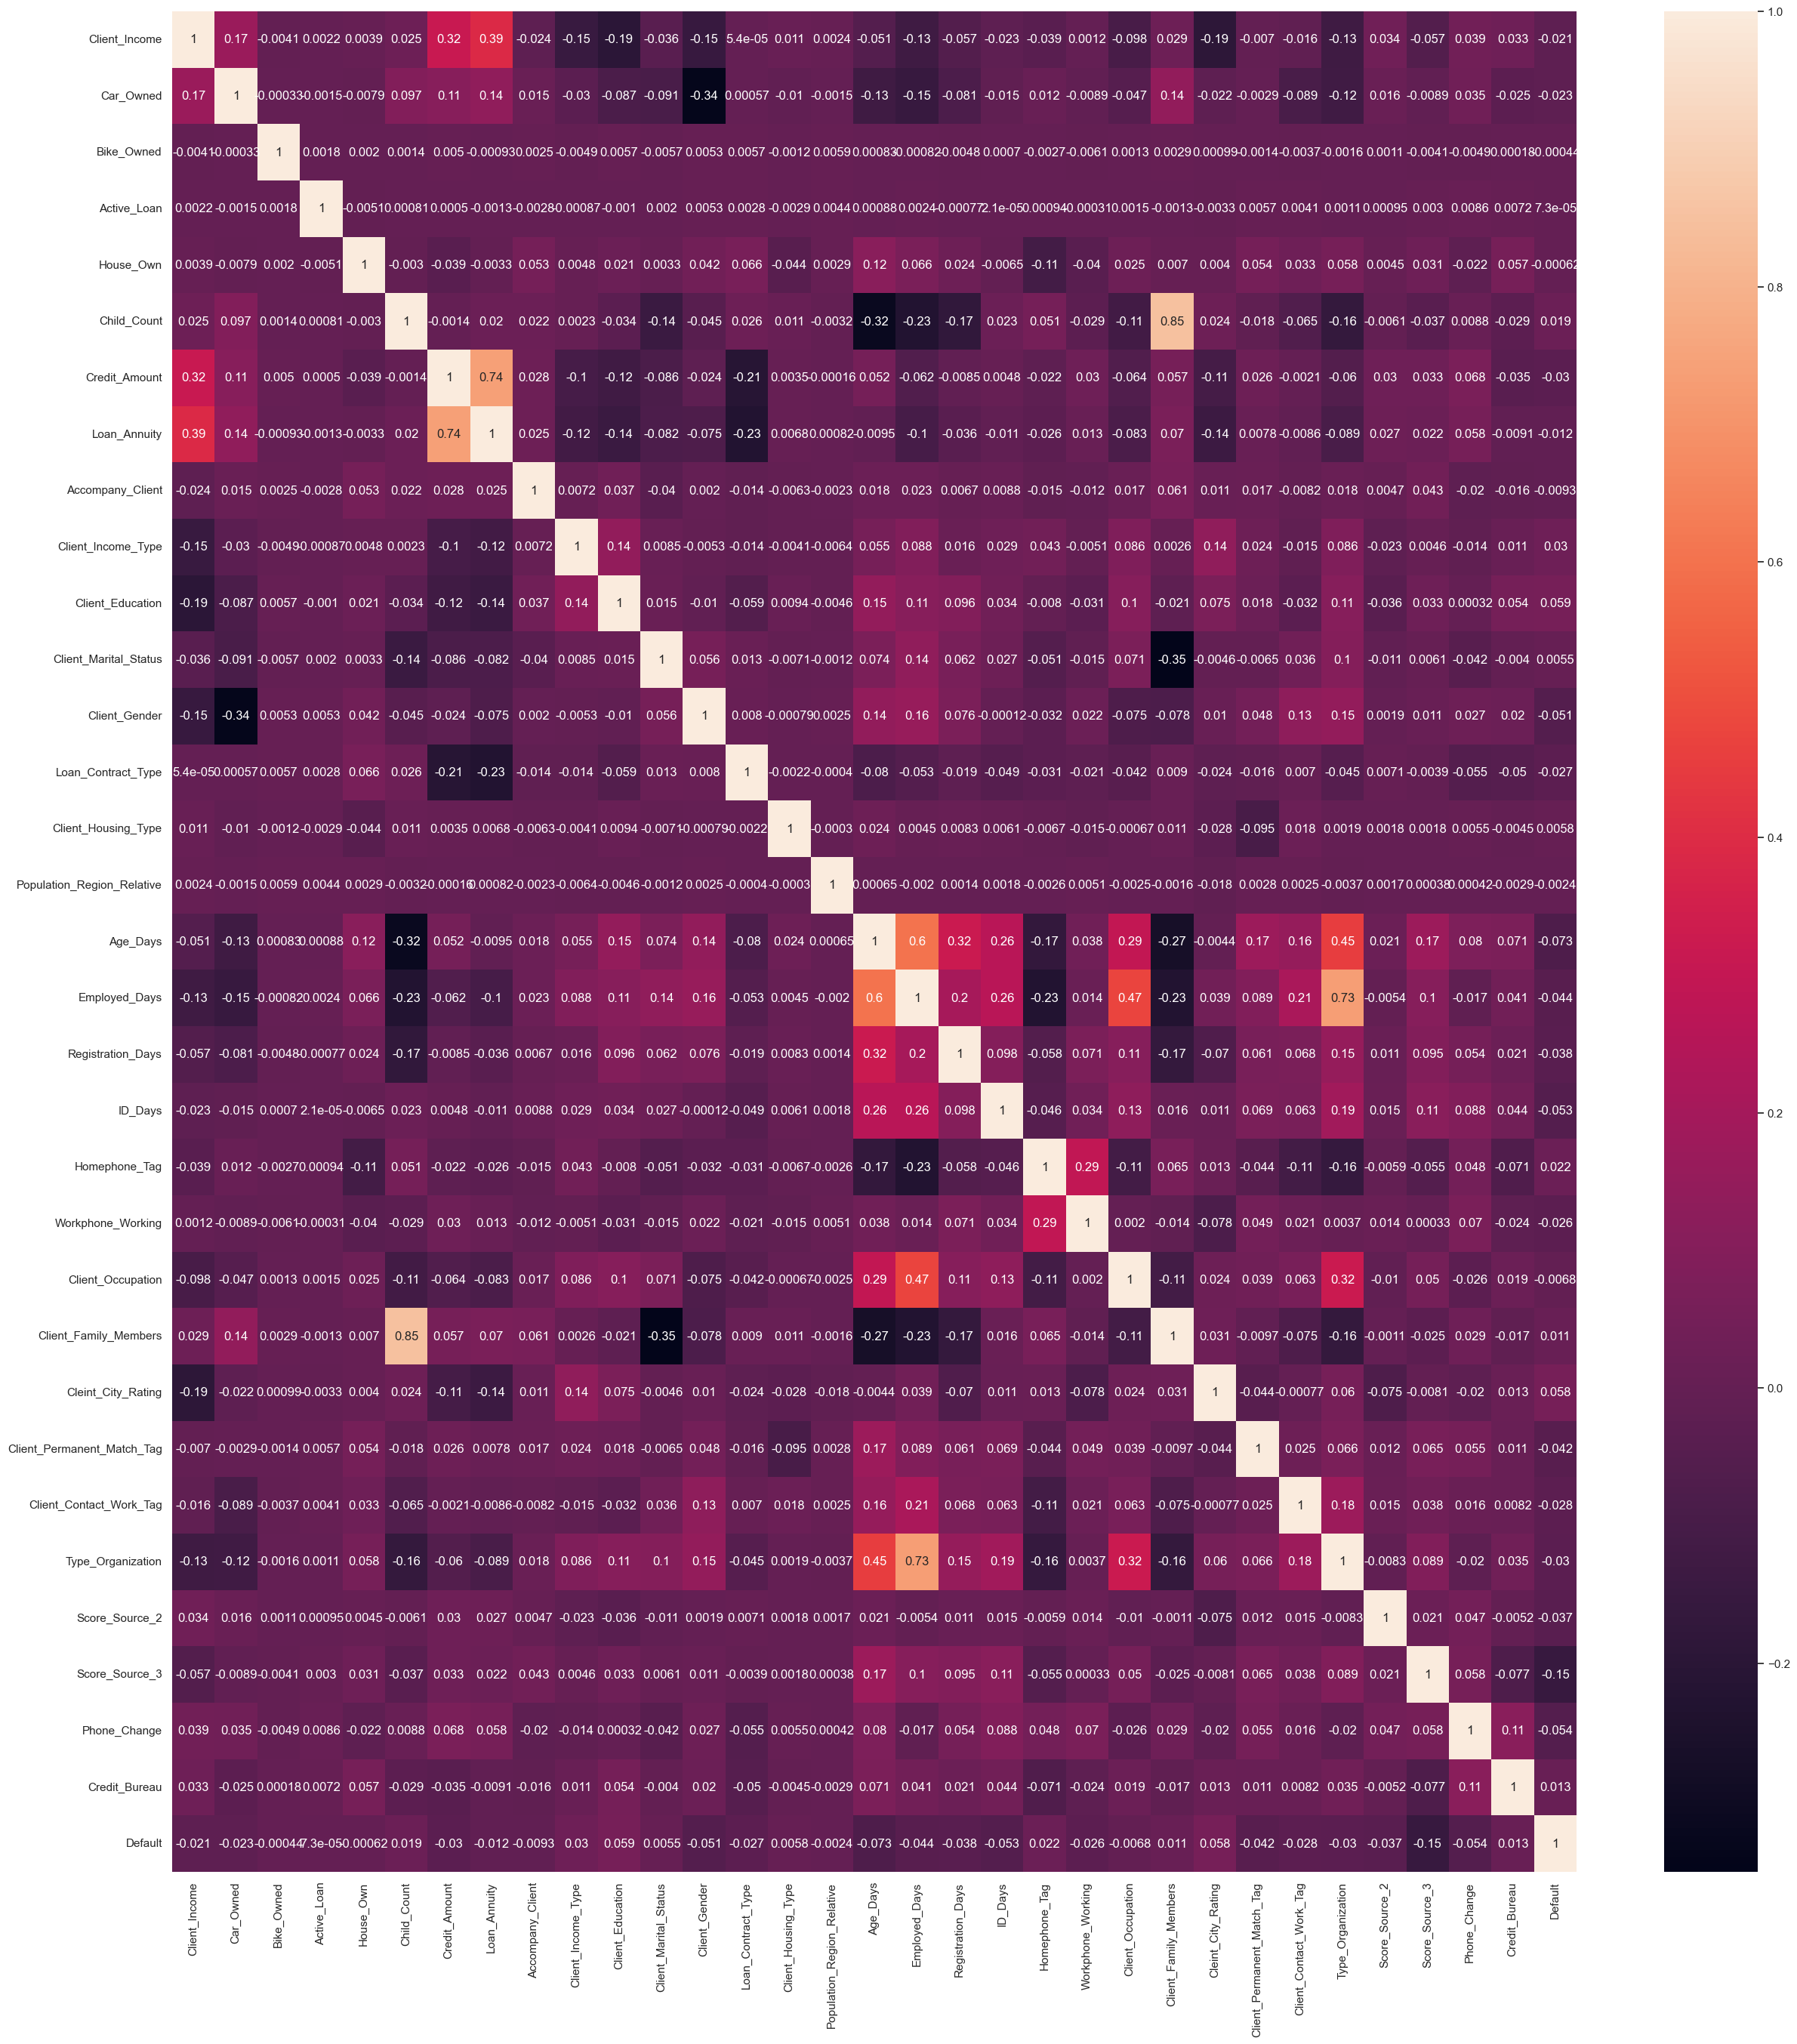

In [47]:
# Correlation Heatmap
plt.figure(figsize=(30, 32))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [48]:
# Your correlation matrix (assuming it's stored in a DataFrame)
correlation_matrix = df.corr()

threshold = 0.8

# Create a boolean mask for significant correlations
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)  # Exclude self-correlation

# Identify columns to remove
columns_to_remove = [col for col in mask.columns if any(mask[col])]

#print the names
print(columns_to_remove)

['Child_Count', 'Client_Family_Members']


In [49]:
# Drop Child_Count column because it have high correlation with Client_Family_Members
df.drop(columns = 'Child_Count', inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   121856 non-null  int32  
 2   Bike_Owned                  121856 non-null  int32  
 3   Active_Loan                 121856 non-null  int32  
 4   House_Own                   121856 non-null  int32  
 5   Credit_Amount               121856 non-null  float64
 6   Loan_Annuity                121856 non-null  float64
 7   Accompany_Client            121856 non-null  int32  
 8   Client_Income_Type          121856 non-null  int32  
 9   Client_Education            121856 non-null  int32  
 10  Client_Marital_Status       121856 non-null  int32  
 11  Client_Gender               121856 non-null  int32  
 12  Loan_Contract_Type          121856 non-null  int32  
 13  Client_Housing

In [51]:
df.shape

(121856, 32)

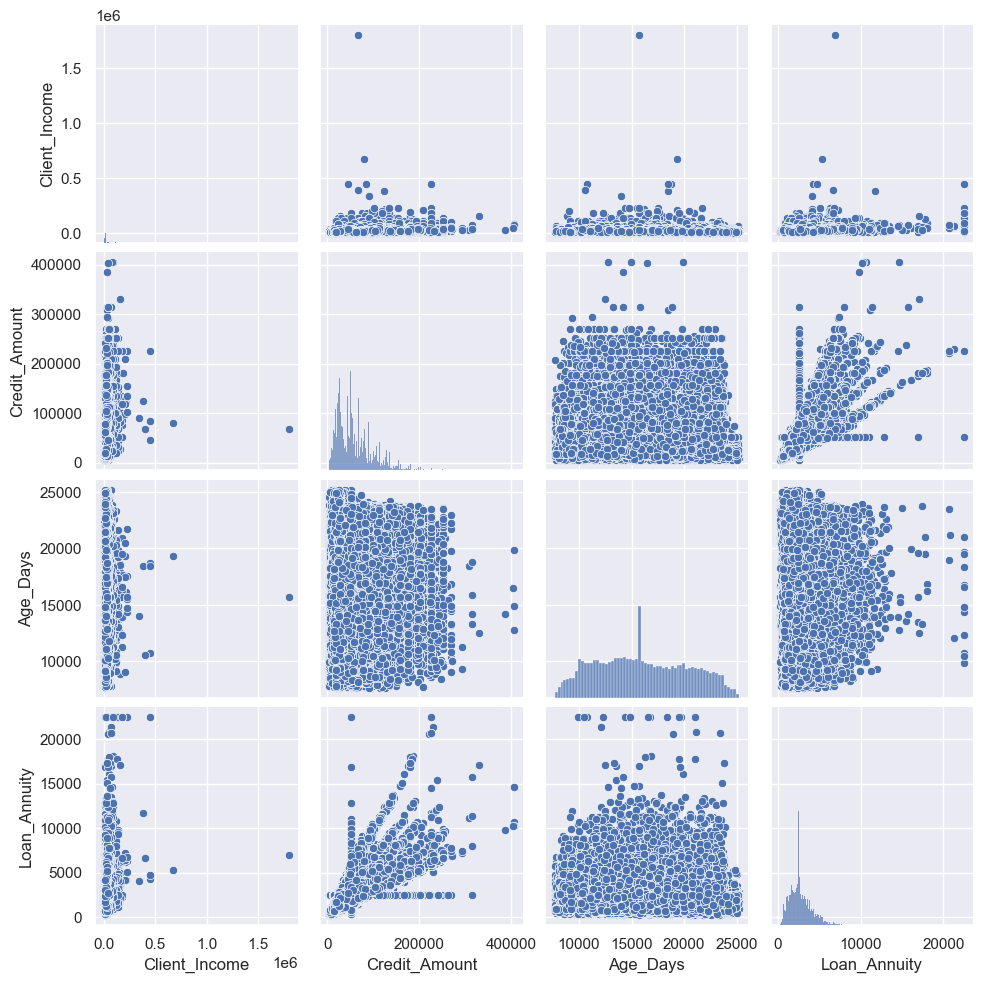

In [52]:
sns.pairplot(df[['Client_Income', 'Credit_Amount', 'Age_Days', 'Loan_Annuity']])
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   121856 non-null  int32  
 2   Bike_Owned                  121856 non-null  int32  
 3   Active_Loan                 121856 non-null  int32  
 4   House_Own                   121856 non-null  int32  
 5   Credit_Amount               121856 non-null  float64
 6   Loan_Annuity                121856 non-null  float64
 7   Accompany_Client            121856 non-null  int32  
 8   Client_Income_Type          121856 non-null  int32  
 9   Client_Education            121856 non-null  int32  
 10  Client_Marital_Status       121856 non-null  int32  
 11  Client_Gender               121856 non-null  int32  
 12  Loan_Contract_Type          121856 non-null  int32  
 13  Client_Housing

In [54]:
# Count the number of samples in each class
class_counts = df['Default'].value_counts()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Print the class counts and imbalance ratio
print("Class Counts:")
print(class_counts)
print("\nImbalance Ratio (1's to 0's):", imbalance_ratio)

Class Counts:
Default
0    112011
1      9845
Name: count, dtype: int64

Imbalance Ratio (1's to 0's): 0.08789315335101017


In [55]:
X_train = df.drop('Default', axis=1)
y_train = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [56]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [57]:
# Calculate the Z-scores for each column in X
z_scores = np.abs(stats.zscore(X_train))

# Define a threshold for Z-scores (e.g., 3)
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores < threshold).all(axis=1)

# Filter the training set to remove outliers
X_train_no_outliers = X_train[outlier_mask]
y_train_no_outliers = y_train[outlier_mask]

In [58]:
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestClassifier(random_state=0)

In [59]:
y_pred_rf = rf_classifier.predict(X_test)

In [60]:
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(confusion_rf)

Confusion Matrix (Random Forest):
[[21664   739]
 [ 1612   357]]


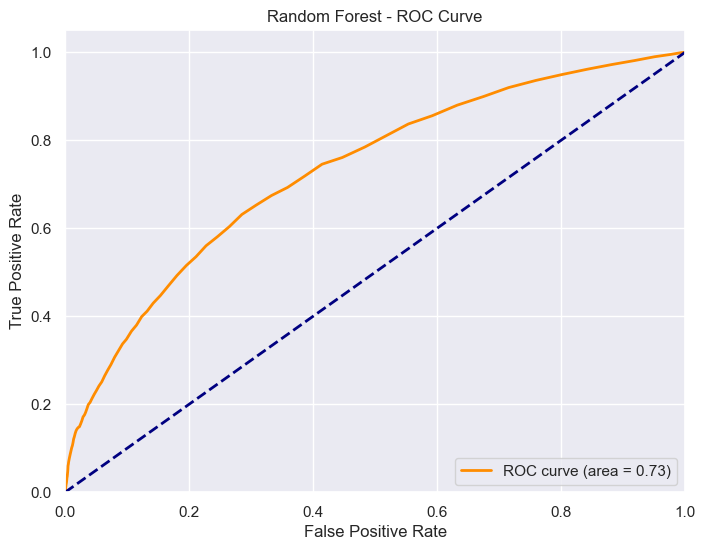

In [61]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score

# Calculate accuracy
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

# Print the accuracy
print("precision (Random Forest):", precision)
print("recall (Random Forest):", recall)

precision (Random Forest): 0.32572992700729925
recall (Random Forest): 0.18131030980192991


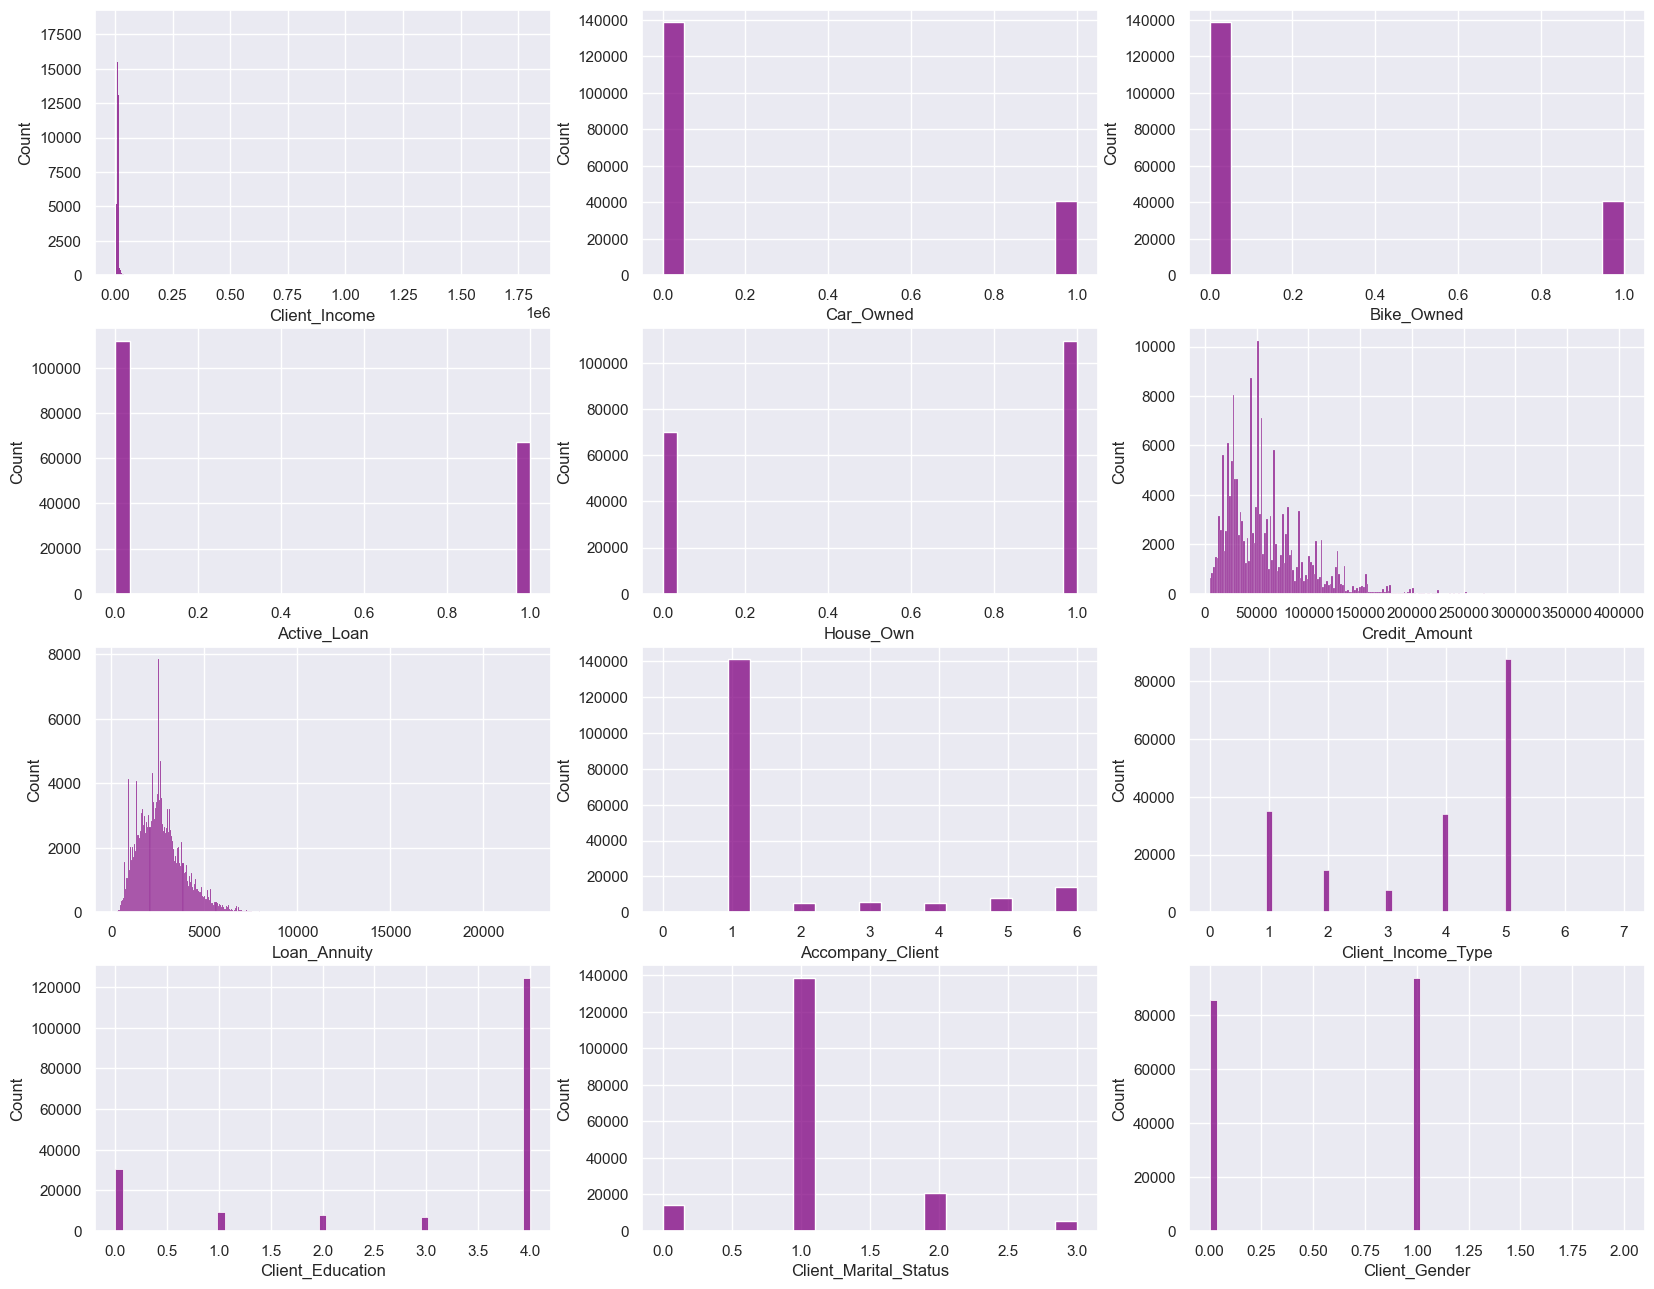

In [63]:
### Distribution after transformation

columnList = list(X_train.columns)

fig = plt.figure(figsize=[20,20])
for col,i in zip(columnList,range(1,13)):
    axes = fig.add_subplot(5,3,i)
    sns.histplot(X_train[col],ax=axes, kde_kws={'bw':1.5}, color='purple')
plt.show();

In [64]:
def plot_roc_curve(y_true,y_prob_preds,ax):
    """
    To plot the ROC curve for the given predictions and model
    """
    fpr,tpr,threshold = roc_curve(y_true,y_prob_preds)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr,"b",label="AUC = %0.2f" % roc_auc)
    ax.set_title("Receiver Operating Characteristic")
    ax.legend(loc='lower right')
    ax.plot([0,1],[0,1],'r--')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate");
    plt.show();

In [65]:
def plot_confustion_matrix(y_true,y_preds,axes,name=''):
    """
    To plot the Confusion Matrix for the given predictions

    """
    cm = confusion_matrix(y_true, y_preds)
    group_names = ['TN','FP','FN','TP']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=axes)
    axes.set_ylim([2,0])
    axes.set_xlabel('Prediction')
    axes.set_ylabel('Actual')
    axes.set_title(f'{name} Confusion Matrix');

In [66]:
def make_classification_report(model,inputs,targets,model_name=None,record=False):
    """
     To Generate the classification report with all the metrics of a given model with confusion matrix as well as ROC AUC curve.
    """
    
    ### Getting the model name from model object
    if model_name is None:
        model_name = str(type(model)).split(".")[-1][0:-2]

    ### Making the predictions for the given model
    preds = model.predict(inputs)
    if model_name in ["LinearSVC"]:
      prob_preds = model.decision_function(inputs)
    else:
      prob_preds = model.predict_proba(inputs)[:,1]

    ### printing the ROC AUC score
    auc_score = roc_auc_score(targets,prob_preds)
    print("ROC AUC Score : {:.2f}%\n".format(auc_score * 100.0))


    ### Plotting the Confusion Matrix and ROC AUC Curve
    fig, axes = plt.subplots(1, 2, figsize=(18,6))
    plot_confustion_matrix(targets,preds,axes[0],model_name)
    plot_roc_curve(targets,prob_preds,axes[1])

		RANDOMFORESTCLASSIFIER MODEL

Training part:
               precision    recall  f1-score   support

          yes       0.98      0.97      0.98     89608
satisnoaction       0.97      0.98      0.98     89608

     accuracy                           0.98    179216
    macro avg       0.98      0.98      0.98    179216
 weighted avg       0.98      0.98      0.98    179216

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.95      0.94     22403
              satisfaction       0.26      0.21      0.23      1969

                  accuracy                           0.89     24372
                 macro avg       0.60      0.58      0.59     24372
              weighted avg       0.88      0.89      0.88     24372

Accuracy score for traing dataset 0.9766985090616909
Accuracy score for validation dataset 0.8895453799441982
Precision: 0.26449511400651465
Recall: 0.20619603859827323
F1-Score: 0.23173515981

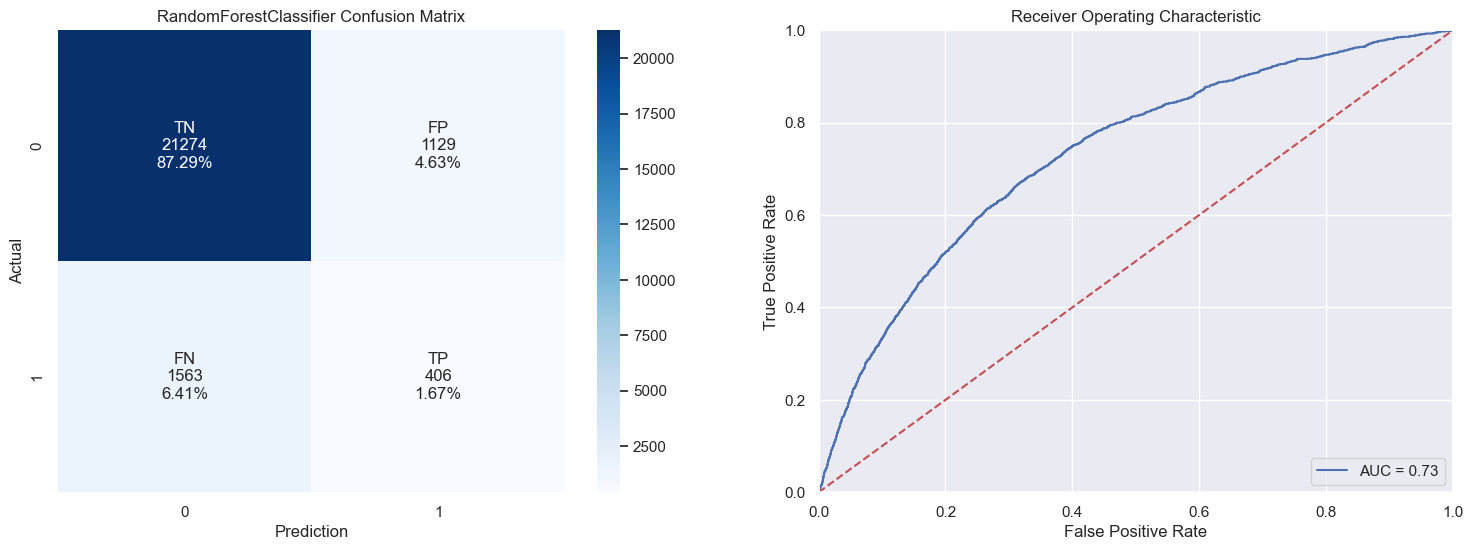

In [67]:
from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(max_depth=18, random_state=42)
model.fit(X_train, y_train)

# prediction
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train, pred_train,
                                    target_names=['yes', 'satisnoaction']))
print('validation part:')
print(classification_report(y_test, pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_test, pred_test))

precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

make_classification_report(model,X_test,y_test)

		RANDOMFORESTCLASSIFIER MODEL

Training part:
               precision    recall  f1-score   support

          yes       0.97      0.95      0.96     68315
satisnoaction       0.96      0.97      0.97     81362

     accuracy                           0.96    149677
    macro avg       0.96      0.96      0.96    149677
 weighted avg       0.96      0.96      0.96    149677

validation part:
                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.93      0.93     22403
              satisfaction       0.20      0.21      0.21      1969

                  accuracy                           0.87     24372
                 macro avg       0.57      0.57      0.57     24372
              weighted avg       0.87      0.87      0.87     24372

Accuracy score for traing dataset 0.9641227443094129
Accuracy score for validation dataset 0.8692351879205645
Precision: 0.20263671875
Recall: 0.2107668867445404
F1-Score: 0.206621857107294
RO

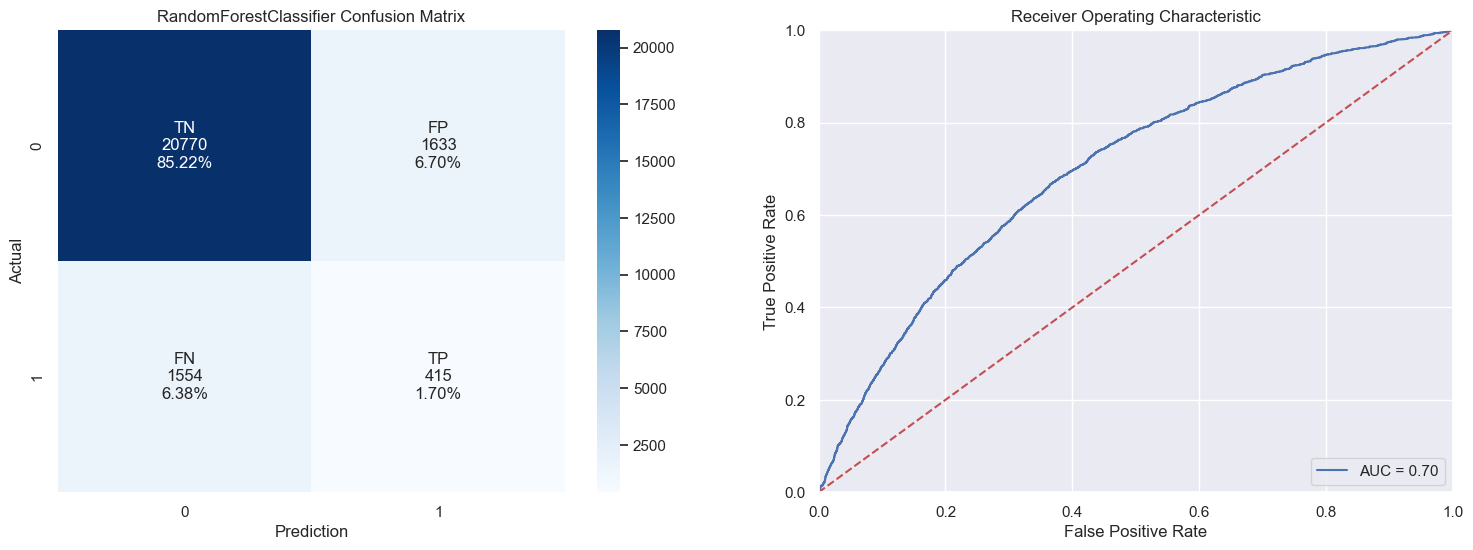

In [68]:
from sklearn.ensemble import RandomForestClassifier

#fit the model
model =RandomForestClassifier(max_depth=16, random_state=42)
model.fit(X_train_no_outliers, y_train_no_outliers)

# prediction
pred_train = model.predict(X_train_no_outliers)
pred_test = model.predict(X_test)

# model name
model_name = str(type(model)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(y_train_no_outliers, pred_train,
                                    target_names=['yes', 'satisnoaction']))
print('validation part:')
print(classification_report(y_test, pred_test,
                                    target_names=['neutral or dissatisfaction', 'satisfaction']))
print("Accuracy score for traing dataset",accuracy_score(y_train_no_outliers, pred_train))
print("Accuracy score for validation dataset",accuracy_score(y_test, pred_test))

precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

make_classification_report(model,X_test,y_test)

In [69]:
lgbm_model = lgb.LGBMClassifier(random_state=42,n_jobs=-1)


NameError: name 'lgb' is not defined